### Zadatak broj 5
- kumulativnost -> oduzmem susjedne, dobivam dnevne
- periodicnost je 7 -> logicno, to mogu dobiti lako
- gledamo sedmodnevni prosjek for each w
- gledamo stopu zarazenih u odnosu na velicinu populacije 
- brojke pretvorimo u neke simbole - malo, srednje, puno i jako puno - 4 kategorije znaci A B C D E 
- nakon toga to napravimo za austriju
- pitanje je jel ih mozemo poravnati - nalazimo optimalno poravnanje
- njemacka, austrija, italija, francuska i hrvatska - napravi visestruko poravnanje
- on ce nam dat HMM - hiden Markov Model !!!!!! sta ovo znaci
- to je to, izmodeliramo smo model


In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'B' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'D' 'D' 'C' 'B' 'B' 'B'
 'B' 'A' 'B' 'B' 'B' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'D' 'C' 'B' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'C' 'C']


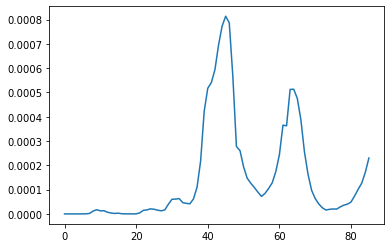

In [200]:
data = pd.read_csv('data.txt', sep=",")
data_croatia = data.drop(['Lat', 'Long', 'Province/State', 'Country/Region'], axis=1) #izbacim sirinu i duzinu
data_croatia = data_croatia.diff(axis=1)
data_croatia = data_croatia.drop(['1/22/20'], axis=1)
data_croatia['9/18/21']=np.NaN
data_croatia['9/19/21']=np.NaN
data_croatia['9/20/21']=np.NaN
data_croatia['9/21/21']=np.NaN
data_croatia['9/22/21']=np.NaN
my_array = data_croatia.values.reshape(7,87,order='F')
my_array = my_array/4300000
week_croatia = np.mean(my_array,axis=0)
week_croatia = week_croatia[:-1]
#y, x = np.histogram(week_croatia, bins=np.arange(51))
#fig, ax = plt.subplots()
#ax.plot(x[:-1], y)
#fig.show()
borders = np.histogram(week_croatia)[1]
week_final = np.empty(86,dtype=str)
for i in range(86): 
    if(week_croatia[i] <= borders[1]):
        week_final[i]='A'
    if((week_croatia[i] <= borders[2]) & (week_croatia[i] > borders[1])):
        week_final[i]='B'
    if((week_croatia[i] <= borders[3]) & (week_croatia[i] > borders[2])):
        week_final[i]='C'
    if((week_croatia[i] <= borders[4]) & (week_croatia[i] > borders[3])):
        week_final[i]='D'
    if((week_croatia[i] > borders[4])):
        week_final[i]='E'
print(week_final)
plt.plot(week_croatia)